# Explanatory Data Analysis with Python and Pandas

## Libraries

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # use to increase the size of plots

link to data source: https://www.kaggle.com/datasets/pranavuikey/black-friday-sales-eda
### context
 A retail company "ABC Private Limited" wants to understand the customer purchase behaviour (specifically, purchase amount)
against various product from last month
 Now they want to bulid a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers againsts different products

## Intial Data Exploration

In [176]:
# import the dataset

df = pd.read_csv(r'D:\Google_Data_Analytics\8_Case_Studies\2_week\7_EDA_Project\10_oct_EDA\train.csv')

In [177]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [178]:
# to view the last 5 rows 
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [179]:
# to view the columns names
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [180]:
# to view the data types of the column in a dataset
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

### summary of numeric columns

In [181]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


## Checking missing values 

In [182]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In Product_Category_2 and Product_Category_3 column has missing values.

In [183]:
round((df.isna().sum()/len(df)) * 100, 2)

User_ID                        0.00
Product_ID                     0.00
Gender                         0.00
Age                            0.00
Occupation                     0.00
City_Category                  0.00
Stay_In_Current_City_Years     0.00
Marital_Status                 0.00
Product_Category_1             0.00
Product_Category_2            31.57
Product_Category_3            69.67
Purchase                       0.00
dtype: float64

Those two columns have 31 and 70 percent of the have null values respectively.

In [184]:
# used fillna to replace null values with zero and inplace option to make changes permanent.
df.fillna(0, inplace=True) 

In [185]:
# to verify the datase has no null values.
round((df.isna().sum()/len(df)) * 100, 2)

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Product_Category_2            0.0
Product_Category_3            0.0
Purchase                      0.0
dtype: float64

## check for duplicates values

In [186]:
df.duplicated().sum()

0

There is no duplicate rows in dataset.

In [187]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


# Univariate Analysis

Question:
    which age group customer is largest number of customer?

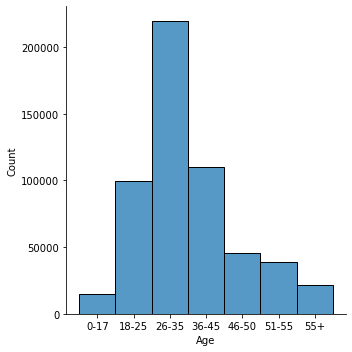

In [188]:
sns.displot(df['Age'].sort_values())


The products are highly purchased by age group between 18 to 45. In that top is 26-35 spending the products.

<AxesSubplot:xlabel='Gender', ylabel='count'>

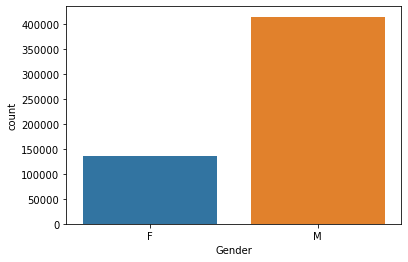

In [189]:
sns.countplot(x = df['Gender'])

The most customer are Male compare to Female.

<AxesSubplot:xlabel='City_Category', ylabel='count'>

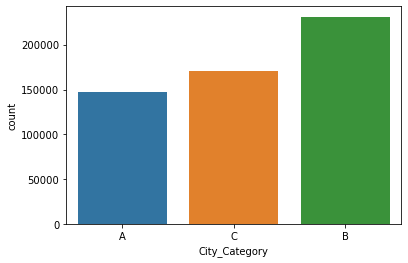

In [190]:
sns.countplot(x =df['City_Category'])

Above barchart shows City B is highest amount customer are purchasing the product followed by City C and A.

In [191]:
# change the Martial status as Numeric to Married for 1 and Unmarried for 0
df['Marital_Status'] = df["Marital_Status"].map({0: "unmarried", 1:"married"})

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

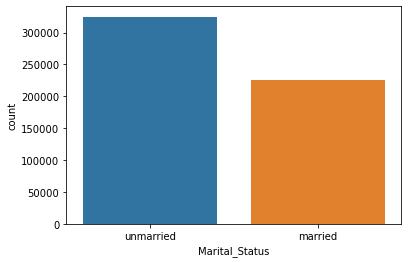

In [192]:
sns.countplot(x = df["Marital_Status"])

Above Bar char clear shows Unmarried customers are spending more than Married customers.

## Bivariate Analysis
Is there any relationship between age group vs purchase

In [193]:
age_grp = df.groupby(df.Age).sum()
age_grp

,User_ID,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Age,,,,,,
0-17,15143112813,132309,76775,96155.0,57725.0,134913183
18-25,99939196632,671348,509371,654936.0,388041.0,913848675
26-35,220270500414,1734073,1166945,1473278.0,846624.0,2031770578
36-45,110350311441,972225,604438,750081.0,424412.0,1026569884
46-50,45846804203,389239,262424,315572.0,173059.0,420843403
51-55,38615925320,339198,222313,267570.0,146334.0,367099644
55+,21568218459,204346,130450,147356.0,77134.0,200767375


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

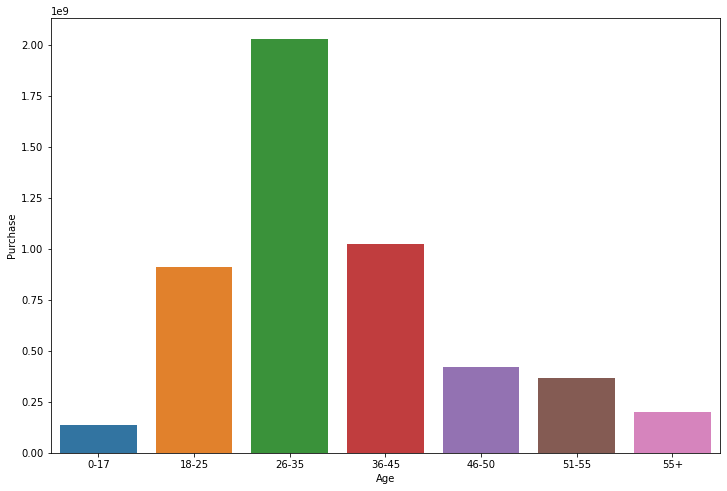

In [225]:
sns.barplot(x = age_grp.index,
           y = age_grp.Purchase)

Highest number of purchase by the Age group 26-35 due to number of customer between age group 26-35 is also high.

In [235]:
Occ_grp = df.groupby(df.Occupation).sum()
Occ_grp = Occ_grp.sort_values(by=["Purchase"], ascending = False)

Occ_grp

,User_ID,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Occupation,,,,,,
4,72521952247,19532,375044,478959.0,279431.0,666244484
0,69847008662,29149,378374,464793.0,263929.0,635406958
7,59315918984,25730,320171,402950.0,228545.0,557371587
1,47584821210,22702,269249,319095.0,172085.0,424614144
17,40164327766,17311,202462,278263.0,180304.0,393281453
12,31270073799,14499,161372,217225.0,133868.0,305449446
20,33658243797,16400,190307,219662.0,116538.0,296570442
14,27396517676,11247,144235,189332.0,107053.0,259454692
16,25449031066,12003,140035,173079.0,94139.0,238346955


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

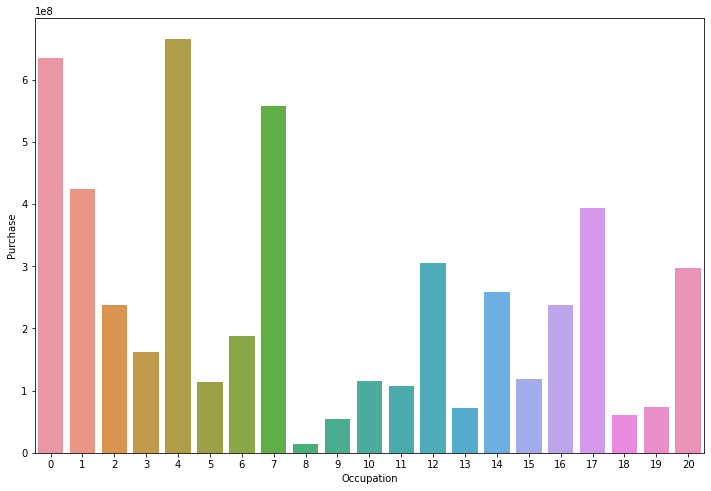

In [236]:
# comparison between the occupation and purchase
# Occupation details are shown in number from 0 to 20

sns.barplot(x=Occ_grp.index, y = Occ_grp.Purchase)

Data visualization for the top five occupation purchased product in ABC company.

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

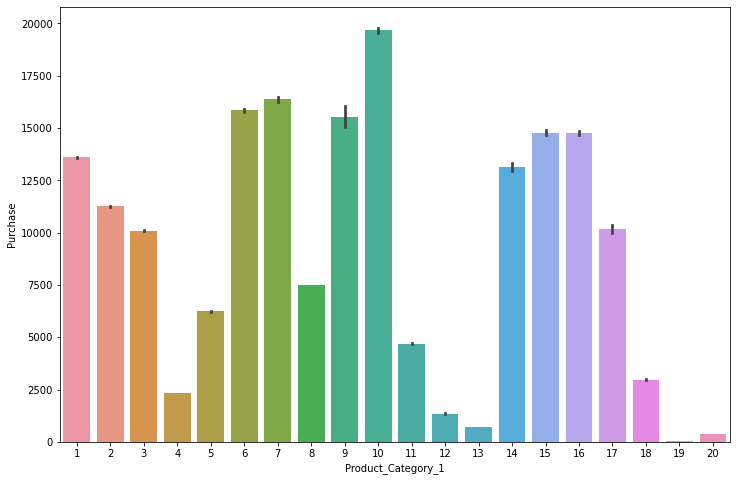

In [223]:
sns.barplot(x= df.Product_Category_1, y = df.Purchase)

Comparison between product category 1 vs Purchase values

In [198]:
gender_grp = df.groupby(df.Gender).sum()

gender_grp

,User_ID,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Gender,,,,,,
F,136234060927,915426,776517,916139.0,468179.0,1186232642
M,415500008355,3527312,2196199,2788809.0,1645150.0,3909580100


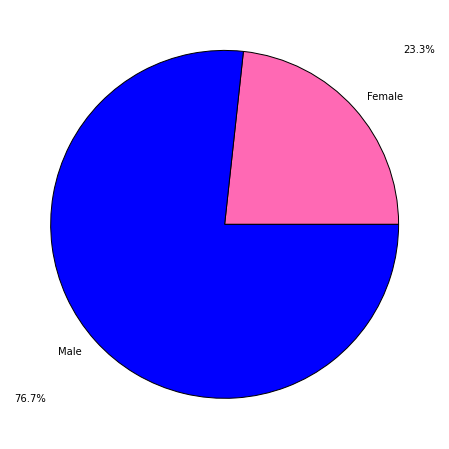

In [222]:
gender = ['Female', 'Male']
mycolors = ["hotpink", "Blue"]
plt.pie(gender_grp.Purchase, labels =gender ,colors = mycolors, autopct='%1.1f%%',pctdistance=1.5,
       wedgeprops={'edgecolor':'k', 'linestyle': '-',    
        'antialiased':True})

plt.show()

Percentage of total purchase by the Gender comparison. Males are purchasing more than female.

In [200]:
status_grp = df.groupby(['Marital_Status']).sum()
status_grp

,User_ID,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Marital_Status,,,,,,
married,226029063614,1862821,1238958,1519591.0,857904.0,2086885295
unmarried,325705005668,2579917,1733758,2185357.0,1255425.0,3008927447


<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

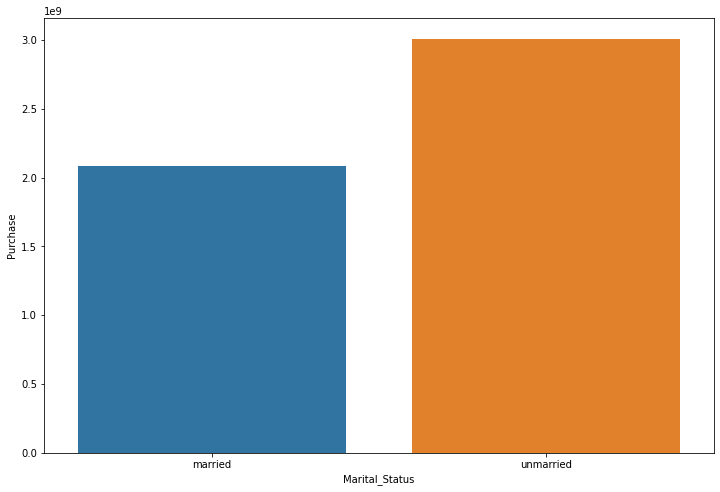

In [221]:
sns.barplot(x=status_grp.index, y = status_grp.Purchase)

Unmarried peoples are purchasing more compare to Married people.

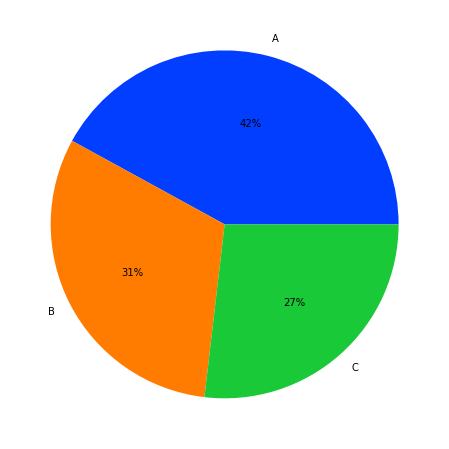

In [234]:
d = df['City_Category'].value_counts()
keys = ['A','B','C']
palette_color = sns.color_palette('bright')
plt.pie(d,labels = keys, colors=palette_color, autopct='%.0f%%')
plt.show()

City wise count of purchase for company

# Conclusion

The dataset contains one month data only. This not enough to predict the behaviour or trends in purchase of the product.

### With the one month of data some observations:

    Age group between 26 to 35 did more purchase. we need to check the what are category they are purchased most, for that we need  category of product required
	
    Why the 26-35 age group having more purchase means there are more customer are in this age group

	Unmarried people are spending more than married peoples means with assumptions they have less responsiblity than the married peoples.
	
    Males are more purchase than the females. we can attract female by increase the female product with offers
